<a href="https://colab.research.google.com/github/Kashew765/MachineLearning/blob/main/GROUPASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Setup + Cleaning

In [35]:
library(ggplot2)
library(dplyr)
library(readr)
library(RColorBrewer)

# Load data
df <- read.csv("Placement_Data_Full_Class.csv", stringsAsFactors = TRUE)

# Missing values
cat("Missing Values per Column:\n")
print(colSums(is.na(df)))

# Drop rows with NA
df_clean <- na.omit(df)

Missing Values per Column:
         sl_no         gender          ssc_p          ssc_b          hsc_p 
             0              0              0              0              0 
         hsc_b          hsc_s       degree_p       degree_t         workex 
             0              0              0              0              0 
       etest_p specialisation          mba_p         status         salary 
             0              0              0              0             67 


Summary Statistics

In [34]:
# Check structure
str(df)
summary(df)

# Separate numerical and categorical columns
num_vars <- names(df_clean)[sapply(df_clean, is.numeric)]
cat_vars <- names(df_clean)[!sapply(df_clean, is.numeric)]
summary(df_clean[sapply(df_clean, is.numeric)])

'data.frame':	215 obs. of  15 variables:
 $ sl_no         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender        : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 1 2 2 2 ...
 $ ssc_p         : num  67 79.3 65 56 85.8 ...
 $ ssc_b         : Factor w/ 2 levels "Central","Others": 2 1 1 1 1 2 2 1 1 1 ...
 $ hsc_p         : num  91 78.3 68 52 73.6 ...
 $ hsc_b         : Factor w/ 2 levels "Central","Others": 2 2 1 1 1 2 2 1 1 1 ...
 $ hsc_s         : Factor w/ 3 levels "Arts","Commerce",..: 2 3 1 3 2 3 2 3 2 2 ...
 $ degree_p      : num  58 77.5 64 52 73.3 ...
 $ degree_t      : Factor w/ 3 levels "Comm&Mgmt","Others",..: 3 3 1 3 1 3 1 3 1 1 ...
 $ workex        : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ etest_p       : num  55 86.5 75 66 96.8 ...
 $ specialisation: Factor w/ 2 levels "Mkt&Fin","Mkt&HR": 2 1 1 2 1 1 1 1 1 1 ...
 $ mba_p         : num  58.8 66.3 57.8 59.4 55.5 ...
 $ status        : Factor w/ 2 levels "Not Placed","Placed": 2 2 2 1 2 1 1 2 2 1 ...
 $ salary        : int

     sl_no       gender      ssc_p           ssc_b         hsc_p      
 Min.   :  1.0   F: 76   Min.   :40.89   Central:116   Min.   :37.00  
 1st Qu.: 54.5   M:139   1st Qu.:60.60   Others : 99   1st Qu.:60.90  
 Median :108.0           Median :67.00                 Median :65.00  
 Mean   :108.0           Mean   :67.30                 Mean   :66.33  
 3rd Qu.:161.5           3rd Qu.:75.70                 3rd Qu.:73.00  
 Max.   :215.0           Max.   :89.40                 Max.   :97.70  
                                                                      
     hsc_b          hsc_s        degree_p          degree_t   workex   
 Central: 84   Arts    : 11   Min.   :50.00   Comm&Mgmt:145   No :141  
 Others :131   Commerce:113   1st Qu.:61.00   Others   : 11   Yes: 74  
               Science : 91   Median :66.00   Sci&Tech : 59            
                              Mean   :66.37                            
                              3rd Qu.:72.00                            


     sl_no            ssc_p           hsc_p          degree_p    
 Min.   :  1.00   Min.   :49.00   Min.   :50.83   Min.   :56.00  
 1st Qu.: 57.75   1st Qu.:65.00   1st Qu.:63.00   1st Qu.:65.00  
 Median :108.50   Median :72.50   Median :68.00   Median :68.00  
 Mean   :106.88   Mean   :71.72   Mean   :69.93   Mean   :68.74  
 3rd Qu.:153.25   3rd Qu.:78.12   3rd Qu.:75.25   3rd Qu.:72.42  
 Max.   :214.00   Max.   :89.40   Max.   :97.70   Max.   :91.00  
    etest_p          mba_p           salary      
 Min.   :50.00   Min.   :52.38   Min.   :200000  
 1st Qu.:60.00   1st Qu.:57.77   1st Qu.:240000  
 Median :72.00   Median :62.24   Median :265000  
 Mean   :73.24   Mean   :62.58   Mean   :288655  
 3rd Qu.:85.00   3rd Qu.:66.76   3rd Qu.:300000  
 Max.   :98.00   Max.   :77.89   Max.   :940000  

Feature Exploration (Categorical vs Numeric)

Bar Charts for Categorical Features

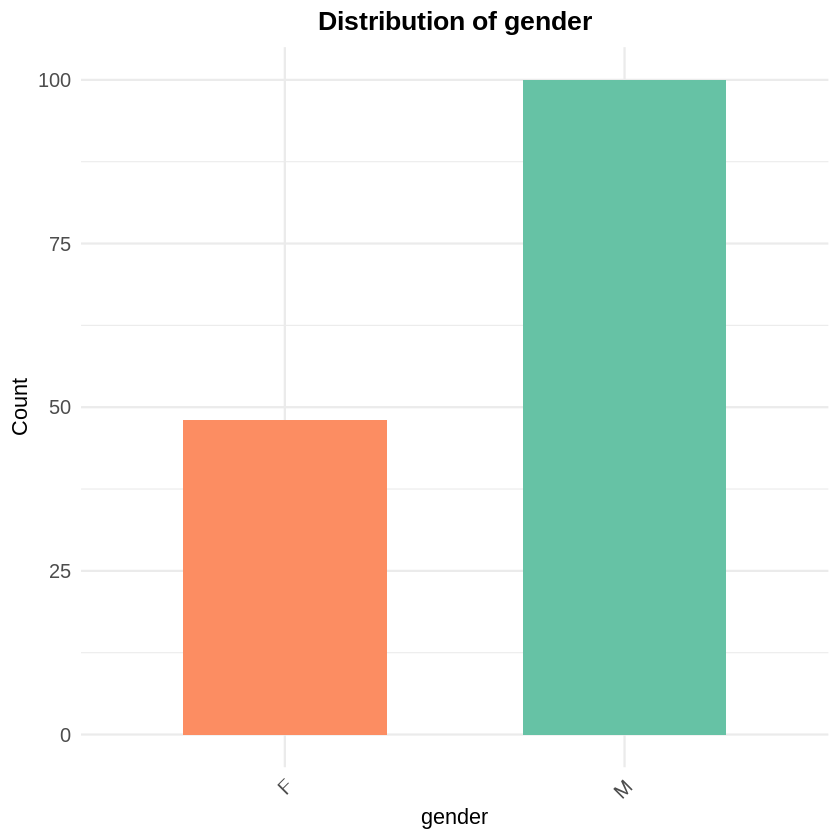

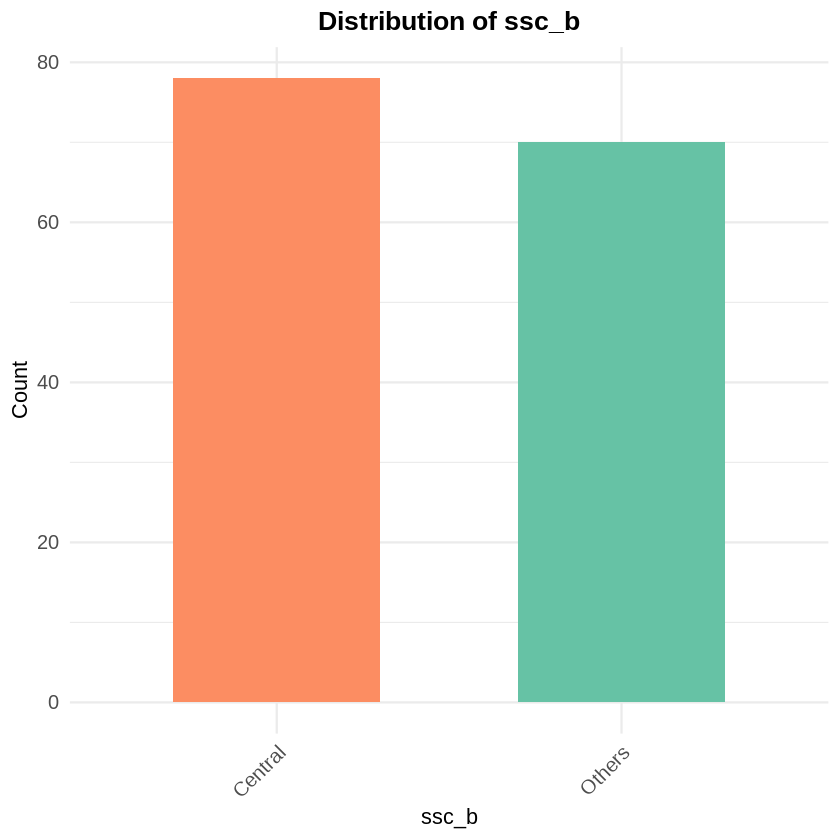

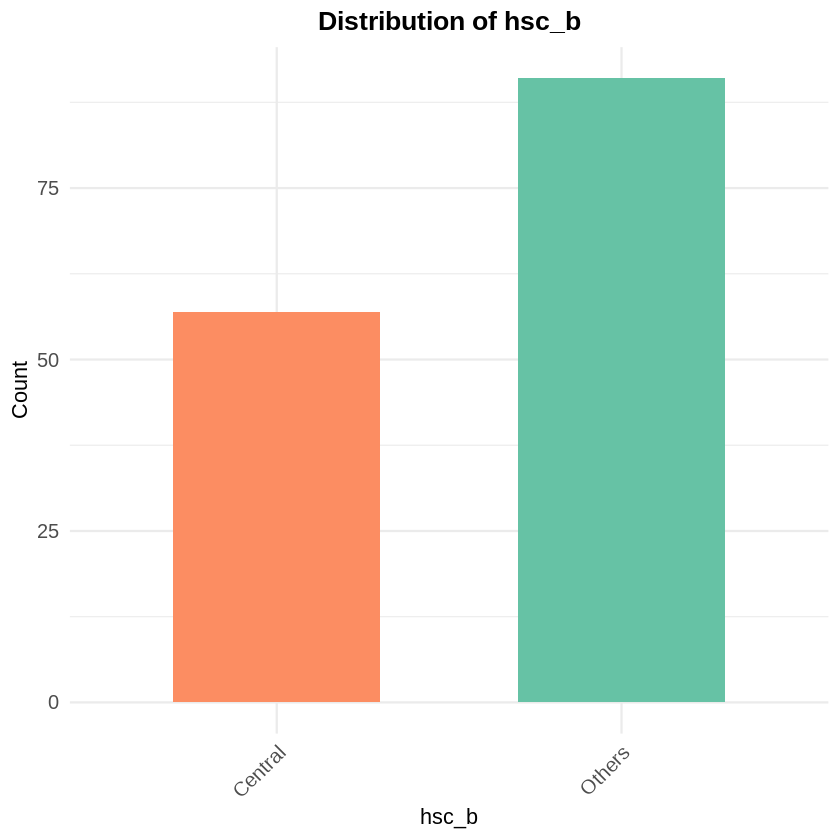

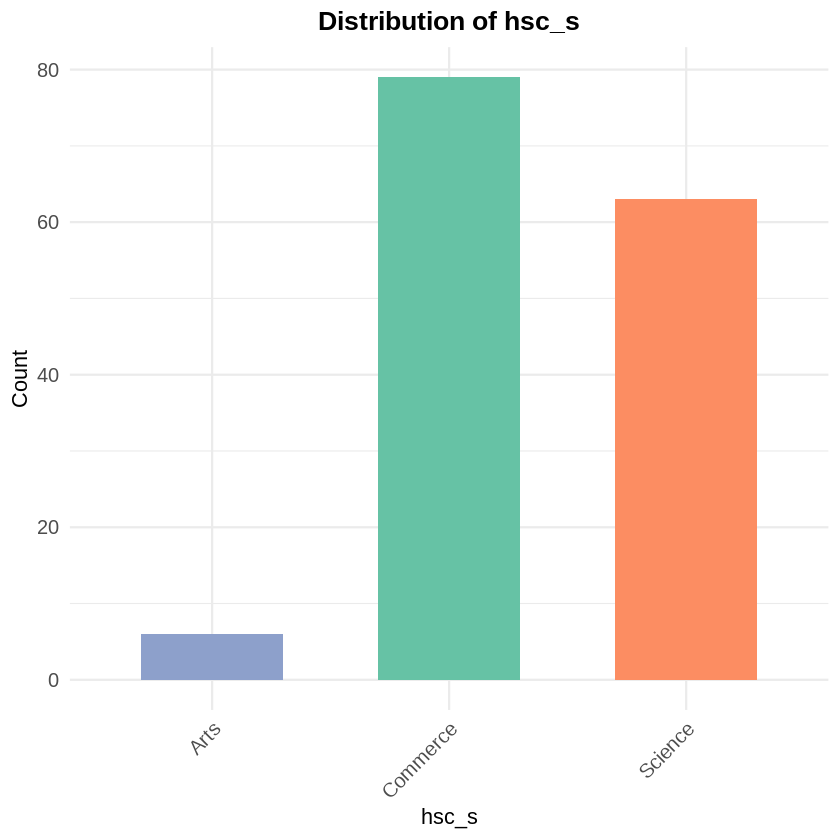

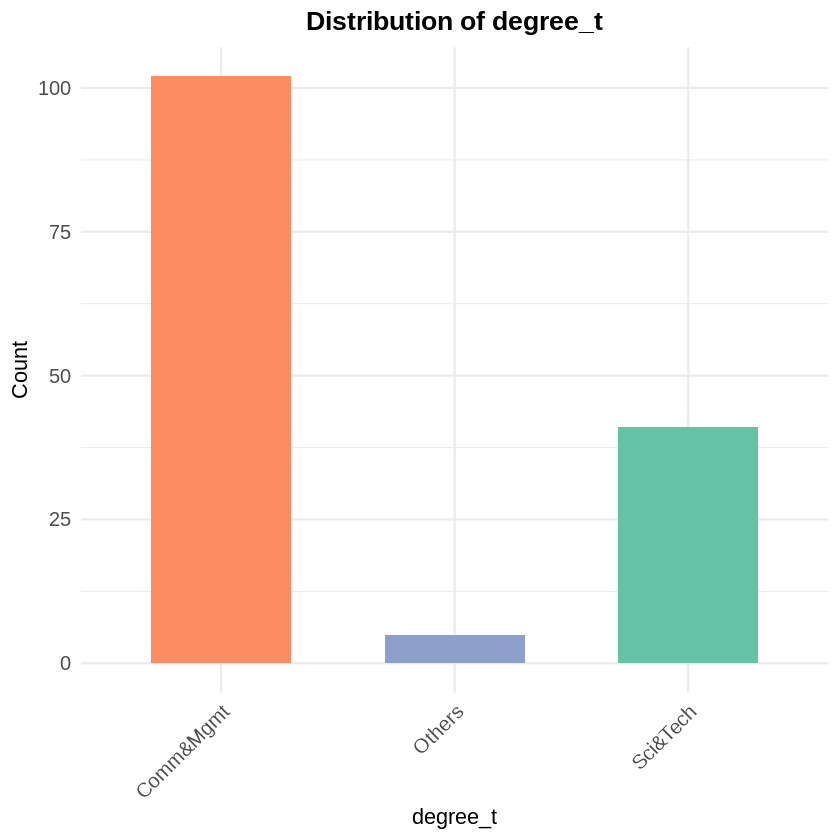

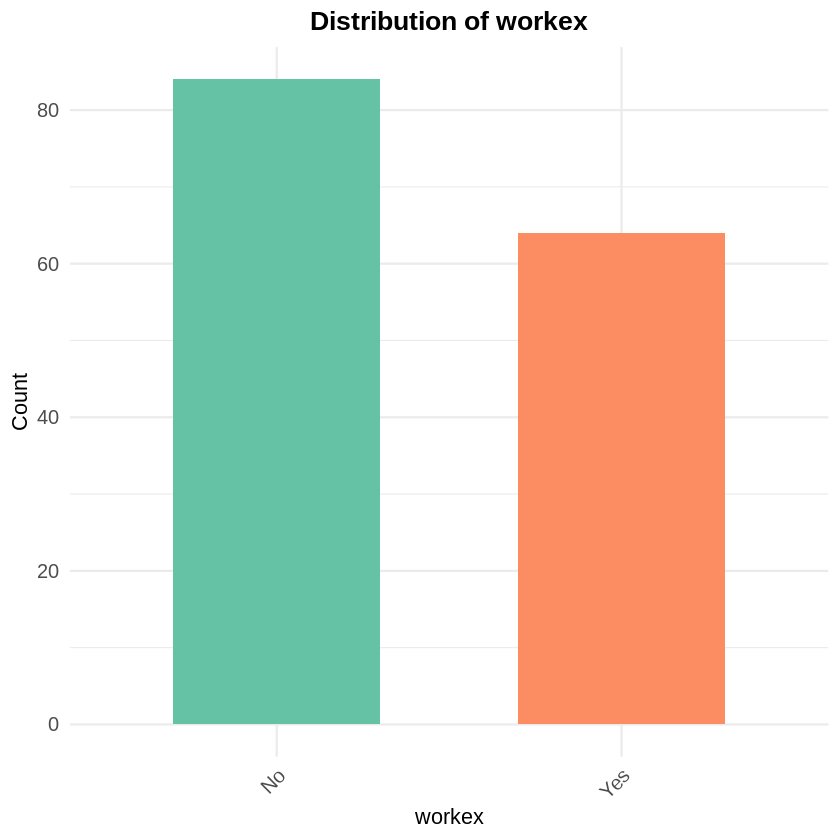

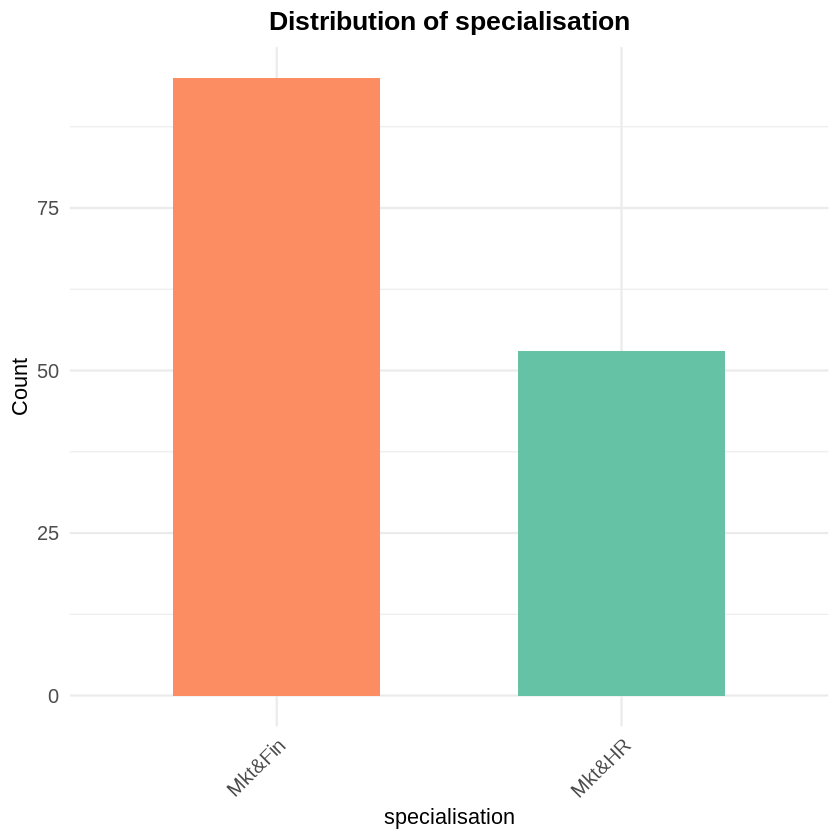

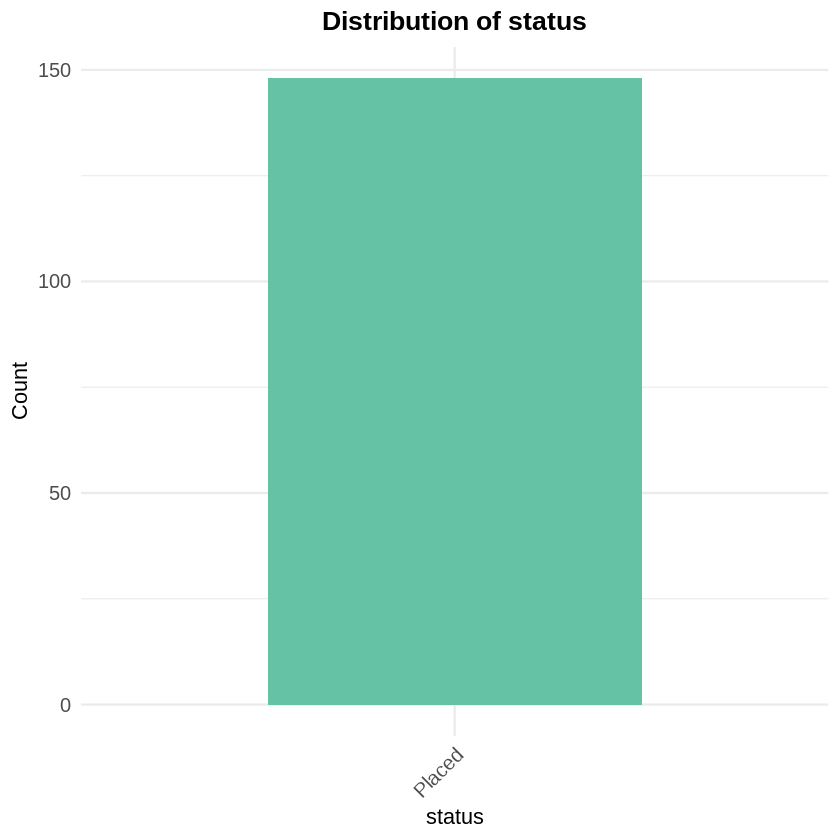

In [29]:
# Load required libraries
library(ggplot2)
library(RColorBrewer)

# Get categorical columns
cat_vars <- names(df_clean)[!sapply(df_clean, is.numeric)]

# Loop through each categorical variable
for (var in cat_vars) {
  uniq_vals <- unique(df_clean[[var]])
  n_vals <- length(uniq_vals)
  palette <- brewer.pal(min(max(n_vals, 3), 8), "Set2")

  # Create a named vector for scale_fill_manual
  fill_colors <- setNames(palette, uniq_vals)

  # Plot
  print(
    ggplot(df_clean, aes_string(x = var, fill = var)) +
      geom_bar(width = 0.6) +
      scale_fill_manual(values = fill_colors) +
      ggtitle(paste("Distribution of", var)) +
      xlab(var) +
      ylab("Count") +
      theme_minimal(base_size = 14) +
      theme(
        plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
        axis.text.y = element_text(size = 12),
        axis.title = element_text(size = 13),
        legend.position = "none"
      )
  )
}


 Distribution Plots : Histograms for Numeric Features

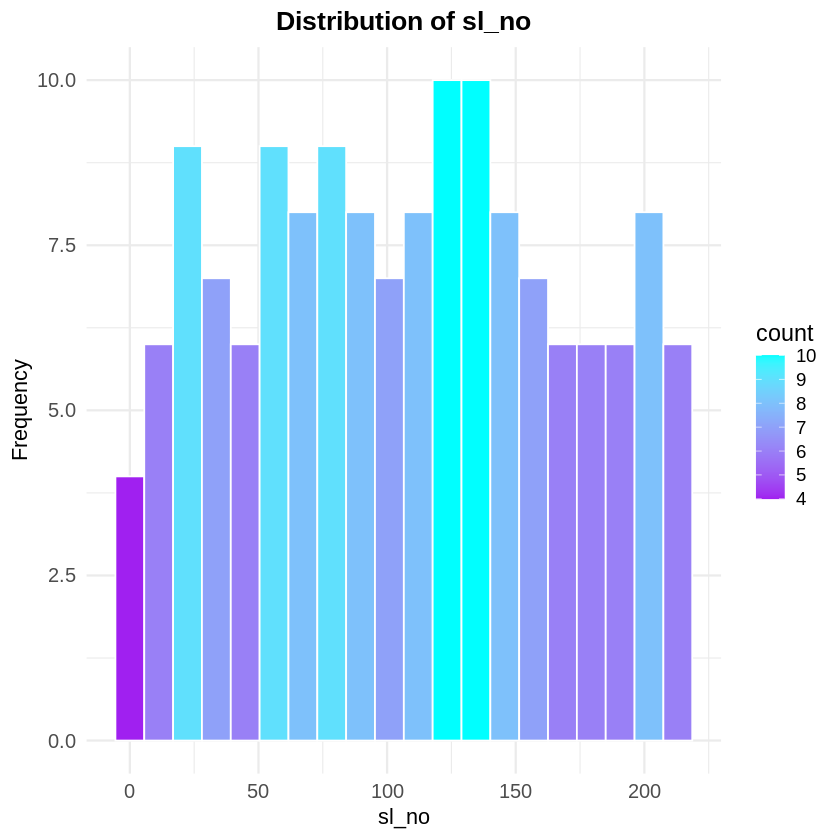

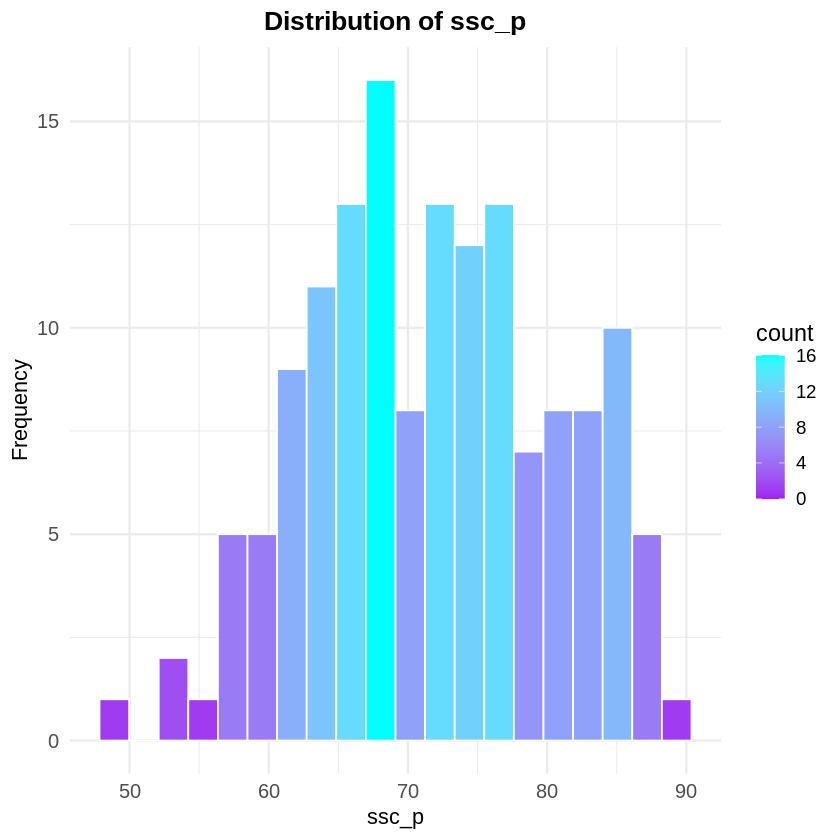

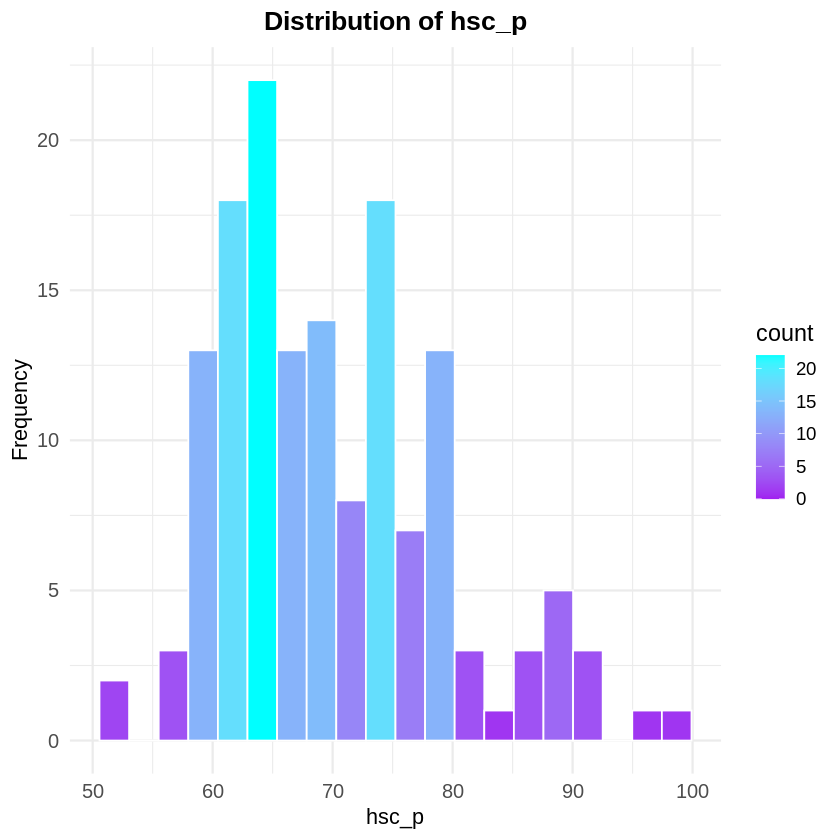

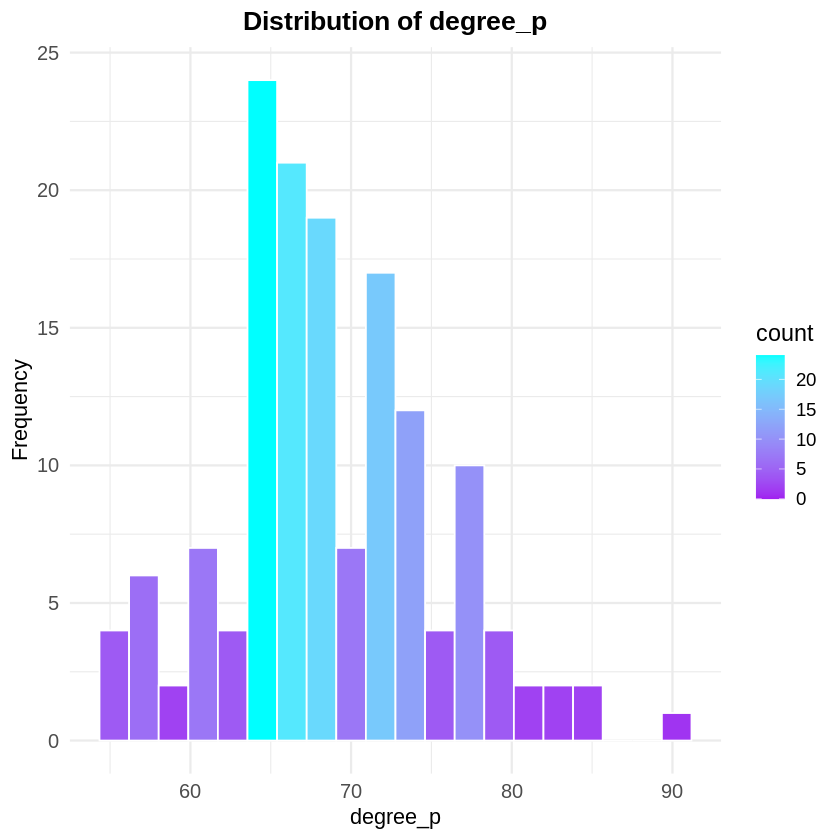

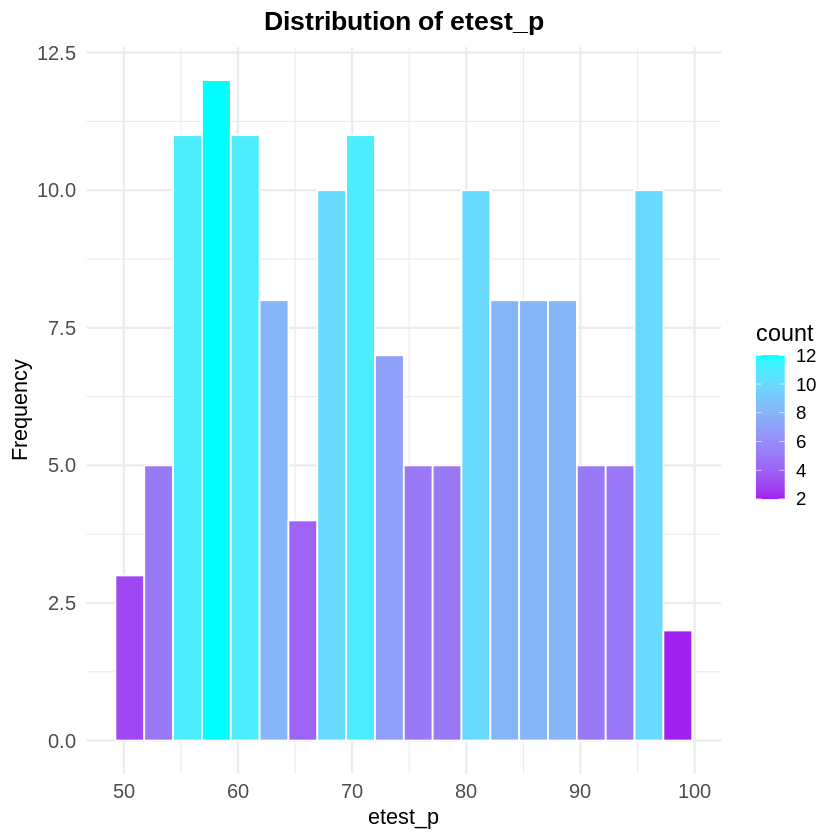

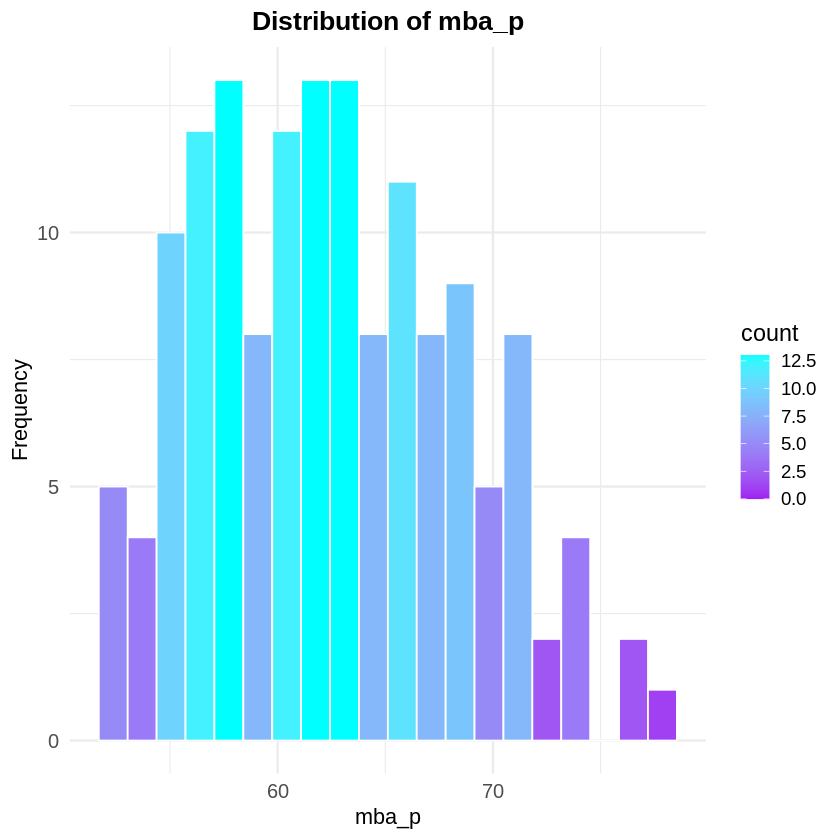

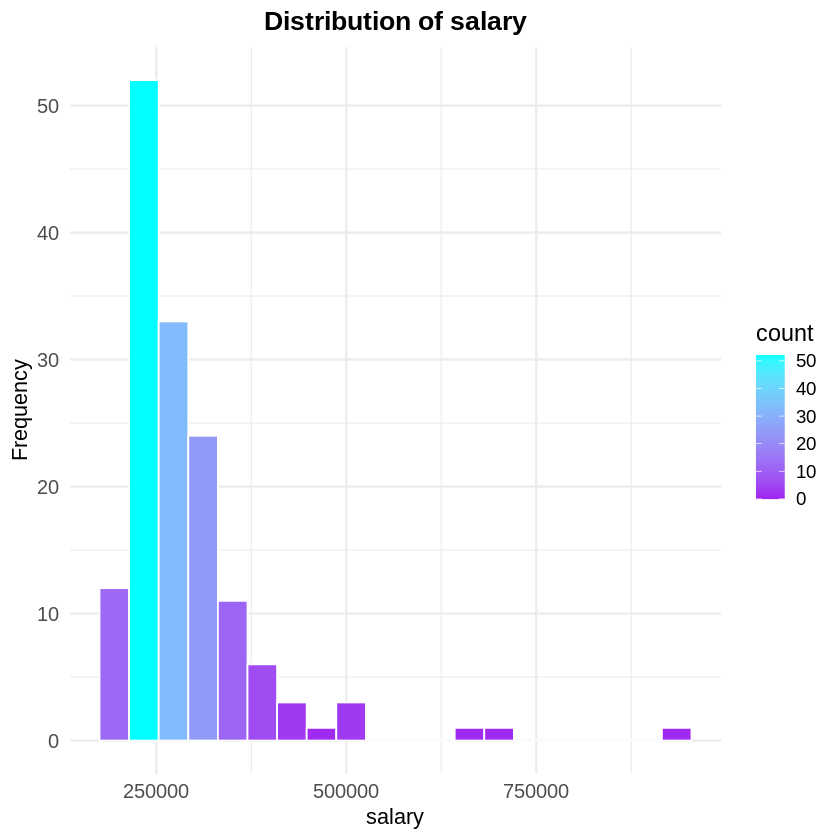

In [24]:
# Load required libraries
library(ggplot2)
library(RColorBrewer)

# Numeric columns
num_vars <- names(df_clean)[sapply(df_clean, is.numeric)]

for (var in num_vars) {
  print(
    ggplot(df_clean, aes_string(x = var)) +
      geom_histogram(aes(fill = ..count..), bins = 20, color = "white") +
      scale_fill_gradient(low = "purple", high = "cyan") +
      theme_minimal(base_size = 14) +
      ggtitle(paste("Distribution of", var)) +
      xlab(var) +
      ylab("Frequency") +
      theme(
        plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 13)
      )
  )
}



Feature Exploration: Boxplot – Gender vs Salary

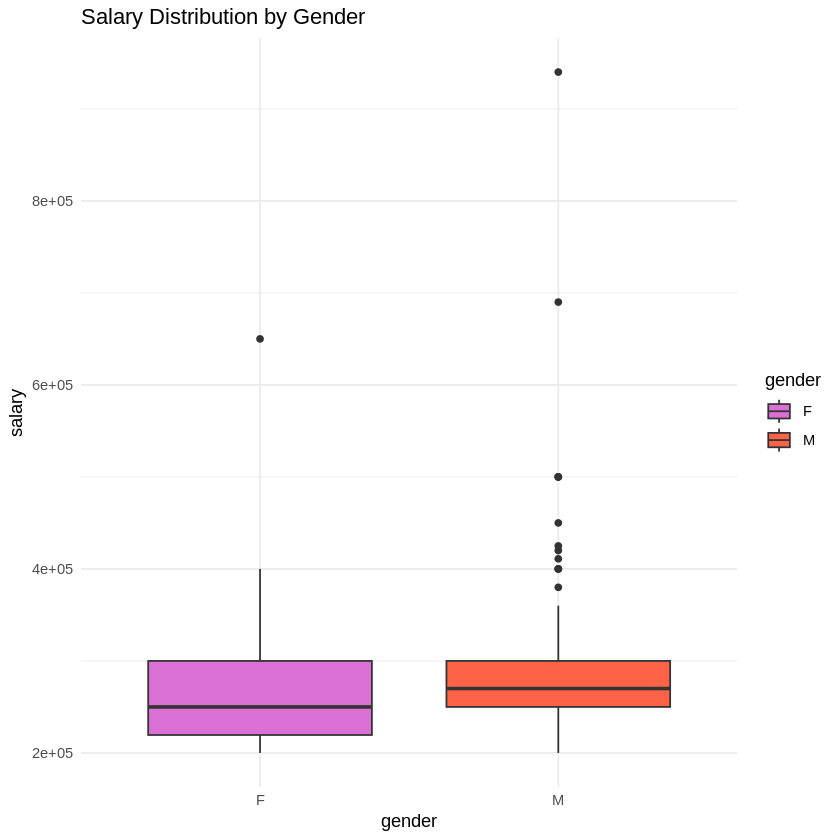

In [9]:
ggplot(df_clean, aes(x = gender, y = salary, fill = gender)) +
  geom_boxplot() +
  scale_fill_manual(values = c("M" = "tomato", "F" = "orchid")) +
  theme_minimal() +
  ggtitle("Salary Distribution by Gender")


Correlation Analysis: Heatmap

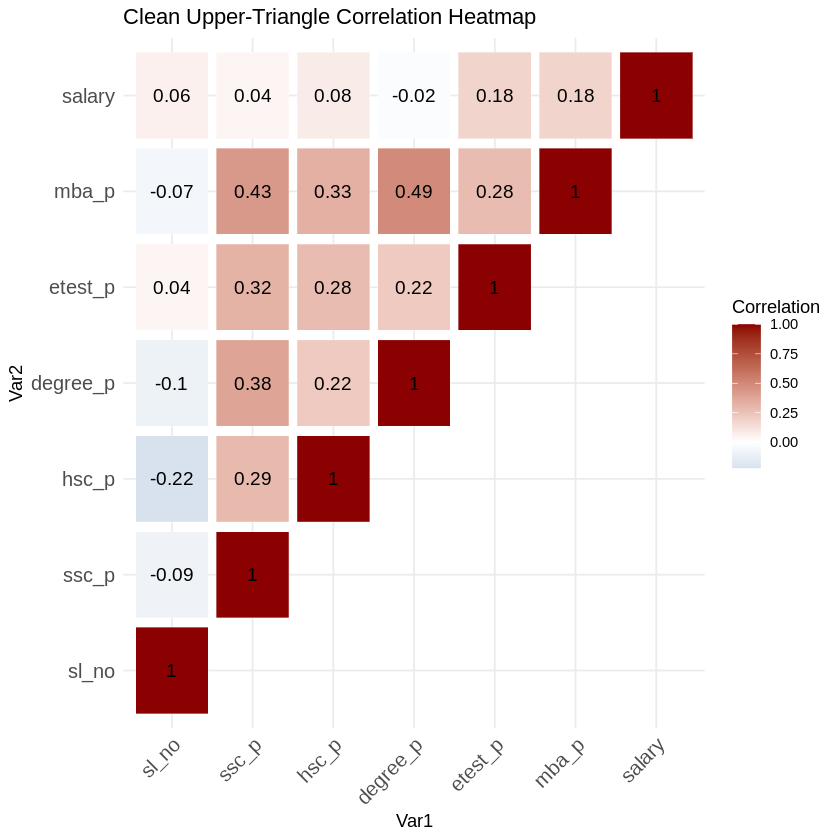

In [18]:
# Select numeric columns
num_data <- df_clean[, sapply(df_clean, is.numeric)]

# Compute correlation matrix and round
cor_matrix <- round(cor(num_data), 2)

# Mask lower triangle to reduce clutter
cor_matrix[lower.tri(cor_matrix)] <- NA

# Convert to long format manually
cor_long <- as.data.frame(as.table(cor_matrix))
colnames(cor_long) <- c("Var1", "Var2", "Correlation")
cor_long <- na.omit(cor_long)  # Remove NA entries

# Plot heatmap
ggplot(cor_long, aes(x = Var1, y = Var2, fill = Correlation)) +
  geom_tile(color = "white", width = 0.9, height = 0.9) +
  geom_text(aes(label = Correlation), size = 4, color = "black") +
  scale_fill_gradient2(low = "steelblue", high = "darkred", mid = "white", midpoint = 0) +
  theme_minimal() +
  ggtitle("Clean Upper-Triangle Correlation Heatmap") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 12),
        axis.text.y = element_text(size = 12))


Scatter Plots with Trendlines

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


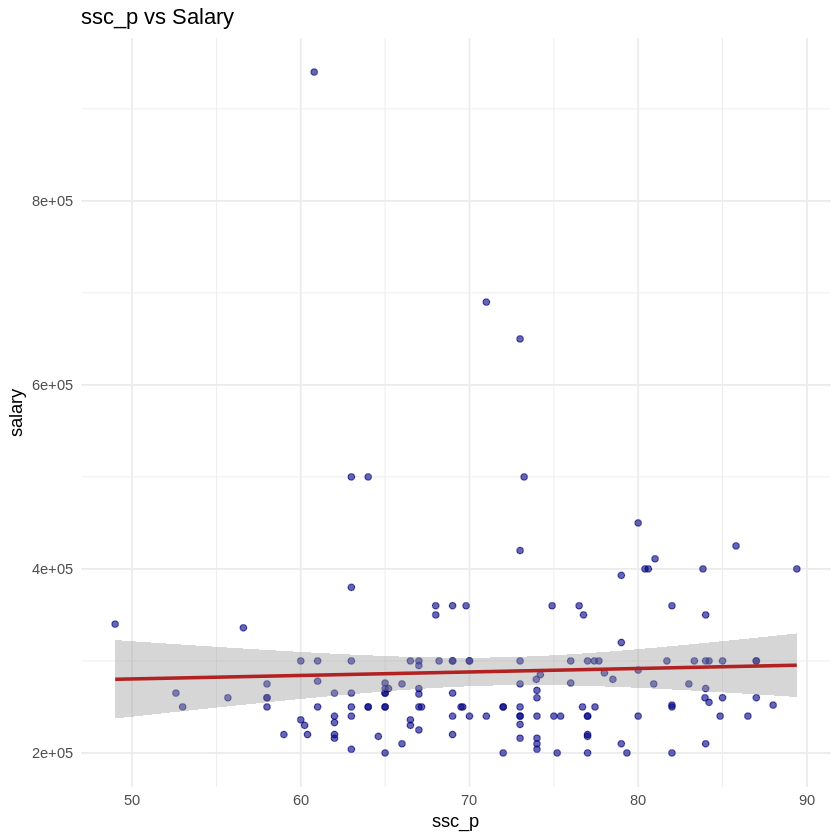

`geom_smooth()` using formula = 'y ~ x'


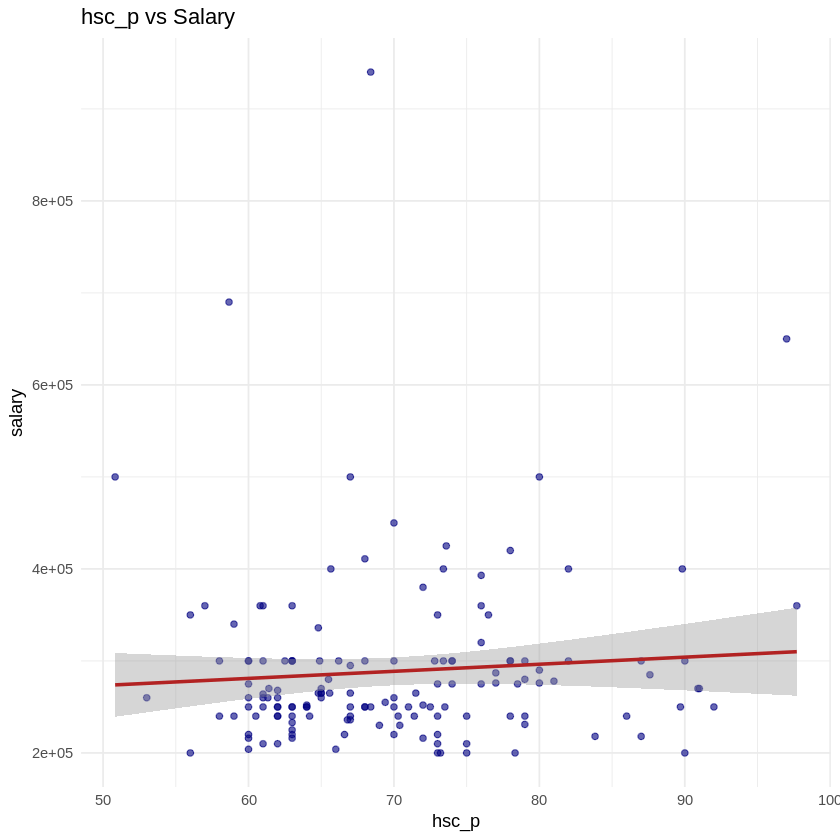

`geom_smooth()` using formula = 'y ~ x'


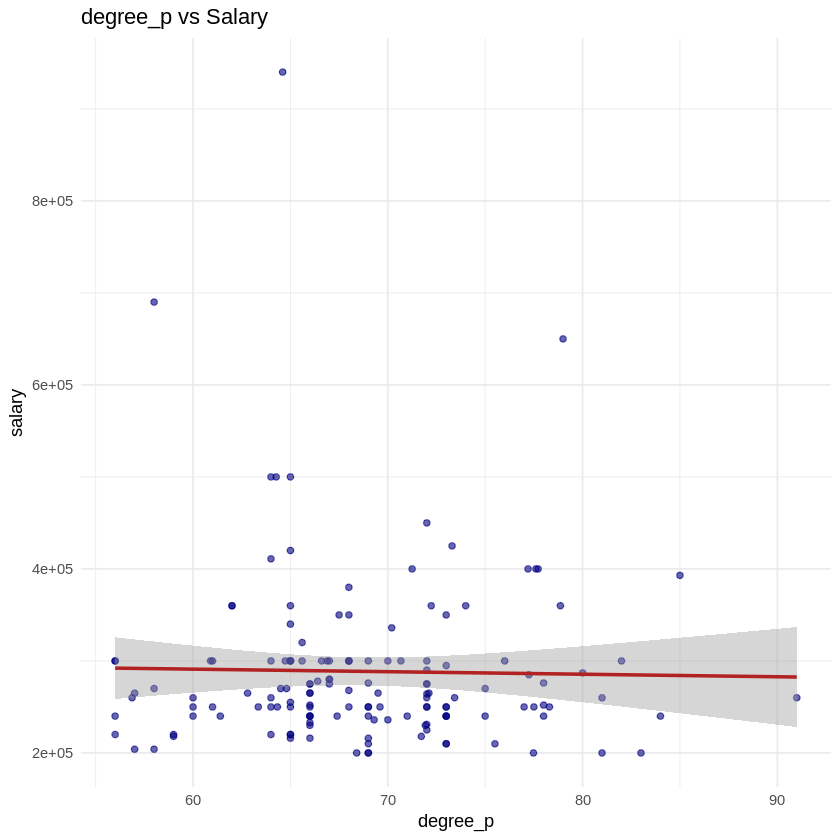

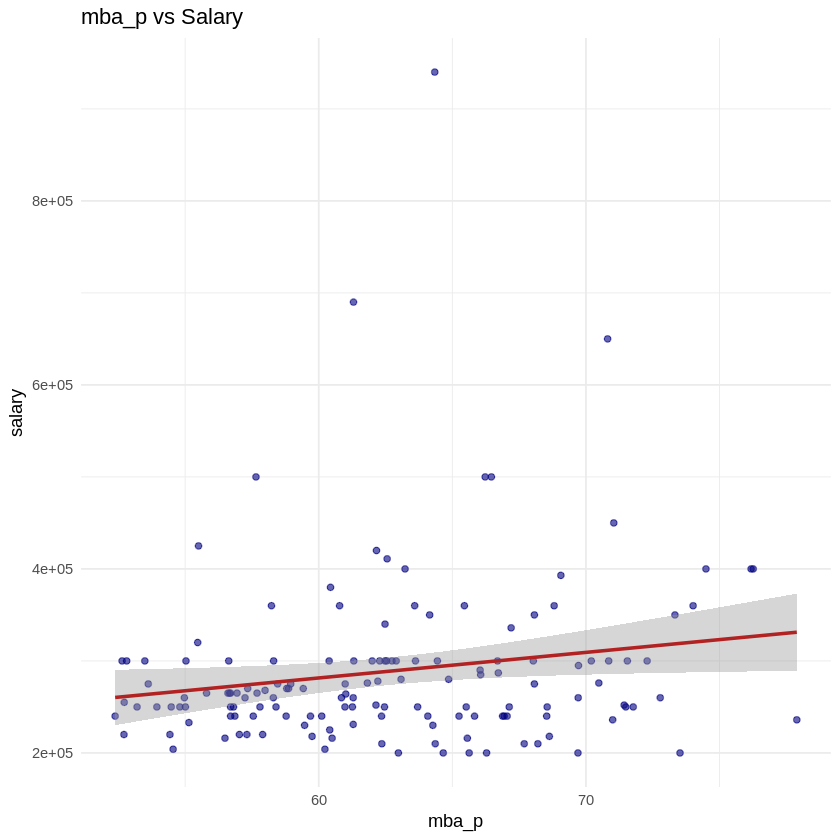

In [10]:

plot_vars <- c("ssc_p", "hsc_p", "degree_p", "mba_p")

for (v in plot_vars) {
  print(
    ggplot(df_clean, aes_string(x = v, y = "salary")) +
      geom_point(color = "navy", alpha = 0.6) +
      geom_smooth(method = "lm", color = "firebrick") +
      theme_minimal() +
      ggtitle(paste(v, "vs Salary"))
  )
}


Placement Outcome vs Specialization

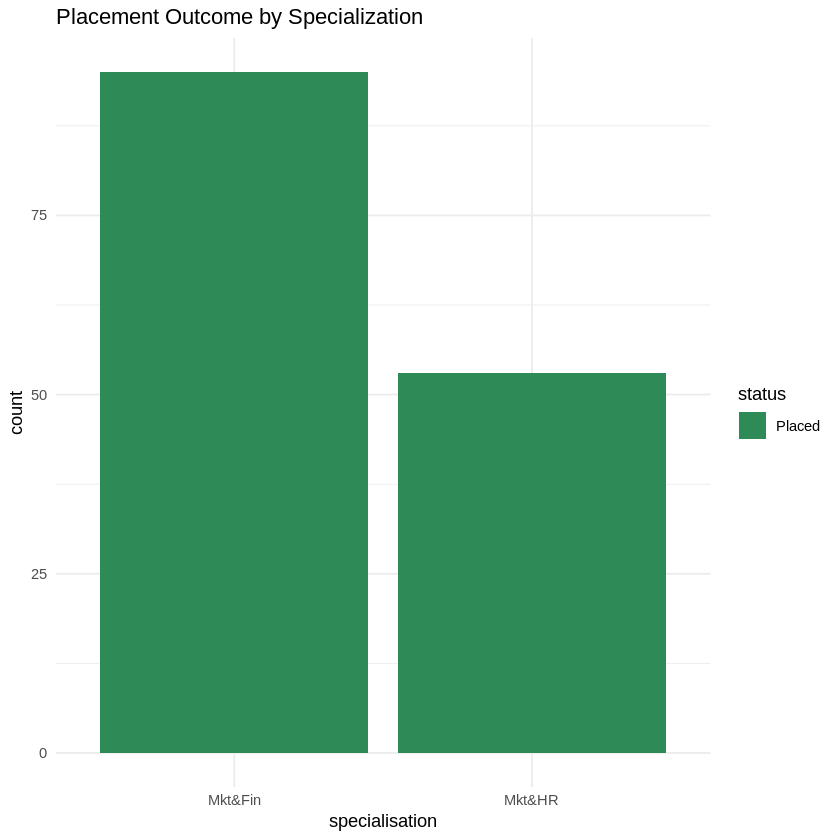

In [13]:

ggplot(df_clean, aes(x = specialisation, fill = status)) +
  geom_bar(position = "dodge") +
  scale_fill_manual(values = c("Placed" = "seagreen", "Not Placed" = "indianred")) +
  ggtitle("Placement Outcome by Specialization") +
  theme_minimal()


Salary by Work Experience & Gender

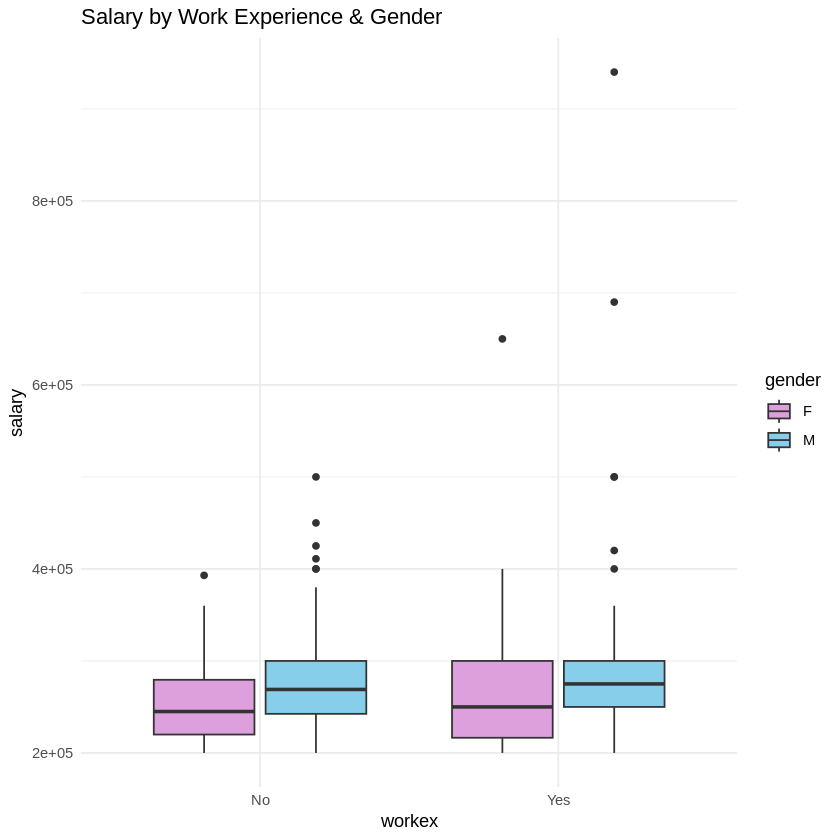

In [14]:

ggplot(df_clean, aes(x = workex, y = salary, fill = gender)) +
  geom_boxplot() +
  scale_fill_manual(values = c("M" = "skyblue", "F" = "plum")) +
  ggtitle("Salary by Work Experience & Gender") +
  theme_minimal()
